<h2>Загрзка данных</h2>

In [155]:
import pandas as pd

In [156]:
train_path = 'train features.csv'
train_data = pd.read_csv(train_path)
train_data.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20,feature 21,class
0,5.774178,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,7.608669,5.586181,...,10.228379,9.764040,0.0,0.000000,0.000000,7.252136,5.256975,1.312622,0.000000,10.0
1,5.555936,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,8.803419,6.784518,...,11.526114,11.350601,0.0,0.483779,0.000000,7.351893,5.785816,0.609365,0.000000,10.0
2,0.000000,1.514093,5.102177,5.699966,3.467111,0.0,5.111816,0.0,0.019606,0.000000,...,0.000000,1.349026,0.0,0.000000,5.990664,1.340265,0.000000,3.209852,1.604113,1.0
3,4.265556,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,7.648307,5.372960,...,9.511336,9.700808,0.0,1.604325,0.000000,6.114448,5.357319,0.191941,1.259218,10.0
4,0.000000,1.413385,4.271587,6.387152,3.975599,0.0,6.747666,0.0,0.150055,0.000000,...,0.508866,0.000000,0.0,0.000000,7.635715,2.907035,0.000000,3.381149,0.518456,1.0


In [157]:
features_number = len(train_data.columns) - 1
features_number

22

<h2>Формирование выходного вектора для байесовской модели</h2>

In [158]:
y1 = train_data['class']
y1 = y1.apply(lambda x: 1 if x == 1 else 0)

In [159]:
y4 = train_data['class']
y4 = y4.apply(lambda x: 1 if x == 4 else 0)

In [160]:
y5 = train_data['class']
y5 = y5.apply(lambda x: 1 if x == 5 else 0)

In [161]:
y8 = train_data['class']
y8 = y8.apply(lambda x: 1 if x == 8 else 0)

In [162]:
train_data = train_data.drop(columns=['class'])

<h2>Создание модели</h2>

In [163]:
import pymc3 as pm
import arviz as az

In [175]:
with pm.Model() as model1:
    logit = pm.Normal('beta_0', mu=0, sd=1)

    for i in range(features_number):
        logit += pm.math.dot(pm.Normal(f'beta_{i+1}', mu=0, sd=0.115), train_data[f'feature {i}'])

    probability = pm.Deterministic('probability', pm.math.sigmoid(logit))
    y_1 = pm.Bernoulli('y_1', p=probability, observed=y1)
    trace1 = pm.sample(draws=10000, tune=1000, chains=3, progressbar=True)

/Users/kirpro/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [beta_22, beta_21, beta_20, beta_19, beta_18, beta_17, beta_16, beta_15, beta_14, beta_13, beta_12, beta_11, beta_10, beta_9, beta_8, beta_7, beta_6, beta_5, beta_4, beta_3, beta_2, beta_1, beta_0]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 71 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


In [9]:
with pm.Model() as model4:
    logit = pm.Normal('beta_0', mu=0, sd=1)
    
    for i in range(features_number):
       logit += pm.math.dot(pm.Normal(f'beta_{i+1}', mu=0, sd=0.125), train_data[f'feature {i}'])

    probability = pm.Deterministic('probability', pm.math.sigmoid(logit))
    y_1 = pm.Bernoulli('y_1', p=probability, observed=y4)
    trace4 = pm.sample(draws=10000, tune=1000, chains=3, progressbar=True)

/Users/kirpro/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [beta_22, beta_21, beta_20, beta_19, beta_18, beta_17, beta_16, beta_15, beta_14, beta_13, beta_12, beta_11, beta_10, beta_9, beta_8, beta_7, beta_6, beta_5, beta_4, beta_3, beta_2, beta_1, beta_0]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 86 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


In [12]:
with pm.Model() as model5:
    logit = pm.Normal('beta_0', mu=0, sd=1)

    for i in range(features_number):
        logit += pm.math.dot(pm.Normal(f'beta_{i+1}', mu=0, sd=0.125), train_data[f'feature {i}'])

    probability = pm.Deterministic('probability', pm.math.sigmoid(logit))
    y_1 = pm.Bernoulli('y_1', p=probability, observed=y5)
    trace5 = pm.sample(draws=10000, tune=1000, chains=3, progressbar=True)

/Users/kirpro/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [beta_22, beta_21, beta_20, beta_19, beta_18, beta_17, beta_16, beta_15, beta_14, beta_13, beta_12, beta_11, beta_10, beta_9, beta_8, beta_7, beta_6, beta_5, beta_4, beta_3, beta_2, beta_1, beta_0]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 93 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [167]:
with pm.Model() as model8:
    logit = pm.Normal('beta_0', mu=0, sd=1)

    for i in range(features_number):
        logit += pm.math.dot(pm.Normal(f'beta_{i+1}', mu=0, sd=0.125), train_data[f'feature {i}'])

    probability = pm.Deterministic('probability', pm.math.sigmoid(logit))
    y_1 = pm.Bernoulli('y_1', p=probability, observed=y8)
    trace8 = pm.sample(draws=10000, tune=1000, chains=3, progressbar=True)

/Users/kirpro/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [beta_22, beta_21, beta_20, beta_19, beta_18, beta_17, beta_16, beta_15, beta_14, beta_13, beta_12, beta_11, beta_10, beta_9, beta_8, beta_7, beta_6, beta_5, beta_4, beta_3, beta_2, beta_1, beta_0]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 66 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


<h2>Сравнение результатов со СНС</h2>

In [346]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
test_path = 'test features.csv'
test_data = pd.read_csv(test_path)

In [348]:
test_data = test_data[test_data['class'] == 4]
test_values = test_data.drop(test_data.iloc[:, 22:], axis = 1)

In [349]:
test_data

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,prediction 1,prediction 2,prediction 3,prediction 4,prediction 5,prediction 6,prediction 7,prediction 8,prediction 9,prediction 10
109,0.0,5.453950,0.0,0.0,0.000000,4.498938,0.000000,1.596159,0.000000,0.000000,...,0.000188,1.820000e-05,8.955990e-04,0.011069,0.987723,3.650000e-07,1.990000e-05,9.570000e-09,0.000033,1.350000e-05
110,0.0,0.000000,0.0,0.0,2.597135,0.000000,0.000000,5.239175,0.000000,0.000000,...,0.000243,1.690000e-09,5.640000e-07,0.998589,0.000786,2.160000e-07,8.060000e-05,1.580000e-10,0.000260,1.930000e-05
111,0.0,3.160148,0.0,0.0,0.000000,3.402933,0.000000,1.168447,0.000000,0.000000,...,0.000802,3.380000e-05,3.556074e-03,0.064212,0.930927,1.230000e-05,3.700000e-05,3.580000e-08,0.000058,1.148990e-04
112,0.0,0.000000,0.0,0.0,3.434360,0.000000,0.000000,3.703460,0.000000,0.000000,...,0.001650,2.380000e-08,1.880000e-06,0.995378,0.000964,2.570000e-06,2.104820e-04,2.150000e-09,0.001685,5.550000e-05
113,0.0,0.000000,0.0,0.0,2.529977,0.376524,0.000000,3.790834,0.000000,0.000000,...,0.003125,3.970000e-06,3.270000e-05,0.970686,0.005852,3.620000e-05,2.694748e-03,1.230000e-06,0.016516,2.491700e-04
114,0.0,0.000000,0.0,0.0,0.000000,2.286958,0.244269,3.500895,0.381525,1.399787,...,0.003691,2.996464e-02,2.186302e-02,0.291573,0.340000,7.097580e-04,1.684993e-01,2.964538e-03,0.070145,3.165407e-03
115,0.0,7.745085,0.0,0.0,0.000000,7.151131,0.000000,1.969287,0.000000,0.000000,...,0.000014,1.620000e-06,7.780000e-06,0.002374,0.997599,3.240000e-09,8.040000e-07,1.960000e-10,0.000001,3.850000e-07
116,0.0,0.000000,0.0,0.0,0.000000,1.558783,0.000000,3.647191,0.000000,0.000000,...,0.000279,5.640000e-08,1.100000e-05,0.968320,0.031075,7.310000e-07,4.760000e-05,8.860000e-10,0.000048,9.800000e-05
117,0.0,1.893085,0.0,0.0,0.000000,2.310770,0.000000,2.928316,0.000000,0.000000,...,0.002452,6.570000e-05,4.747176e-03,0.387166,0.596979,3.550000e-05,1.547251e-03,2.770000e-06,0.001040,1.346998e-03
118,0.0,0.278418,0.0,0.0,0.735379,1.009334,0.483721,2.342999,0.000000,0.000000,...,0.025271,2.198313e-02,1.380023e-01,0.240905,0.389769,1.047370e-02,2.372493e-02,3.227932e-03,0.090733,7.278271e-03


In [181]:
def get_posterior_distribution(trace, sample):
    logit = trace['beta_0']
    for i in range(features_number):
        logit += trace[f'beta_{i+1}'] * sample[i]

    return 1 / (1 + np.exp(-logit))

In [345]:
test_sample = test_values.iloc[0].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
bayes_predicted_class_prediction = get_posterior_distribution(trace5, test_sample)

IndexError: single positional indexer is out-of-bounds

In [306]:
predictions = test_data['prediction 4'].to_numpy()

In [307]:
test_sample = test_values.iloc[1].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
test_sample = test_values.iloc[3].to_numpy()
bayes_actual_class_prediction_2 = get_posterior_distribution(trace4, test_sample)
test_sample = test_values.iloc[4].to_numpy()
bayes_actual_class_prediction_3 = get_posterior_distribution(trace4, test_sample)
test_sample = test_values.iloc[7].to_numpy()
bayes_actual_class_prediction_4 = get_posterior_distribution(trace4, test_sample)
test_sample = test_values.iloc[10].to_numpy()
bayes_actual_class_prediction_5 = get_posterior_distribution(trace4, test_sample)
test_sample = test_values.iloc[11].to_numpy()
bayes_actual_class_prediction_6 = get_posterior_distribution(trace4, test_sample)

In [308]:
CNN_prediction_actual_1 = predictions[1]
CNN_prediction_actual_2 = predictions[3]
CNN_prediction_actual_3 = predictions[4]
CNN_prediction_actual_4 = predictions[7]
CNN_prediction_actual_5 = predictions[10]
CNN_prediction_actual_6 = predictions[11]

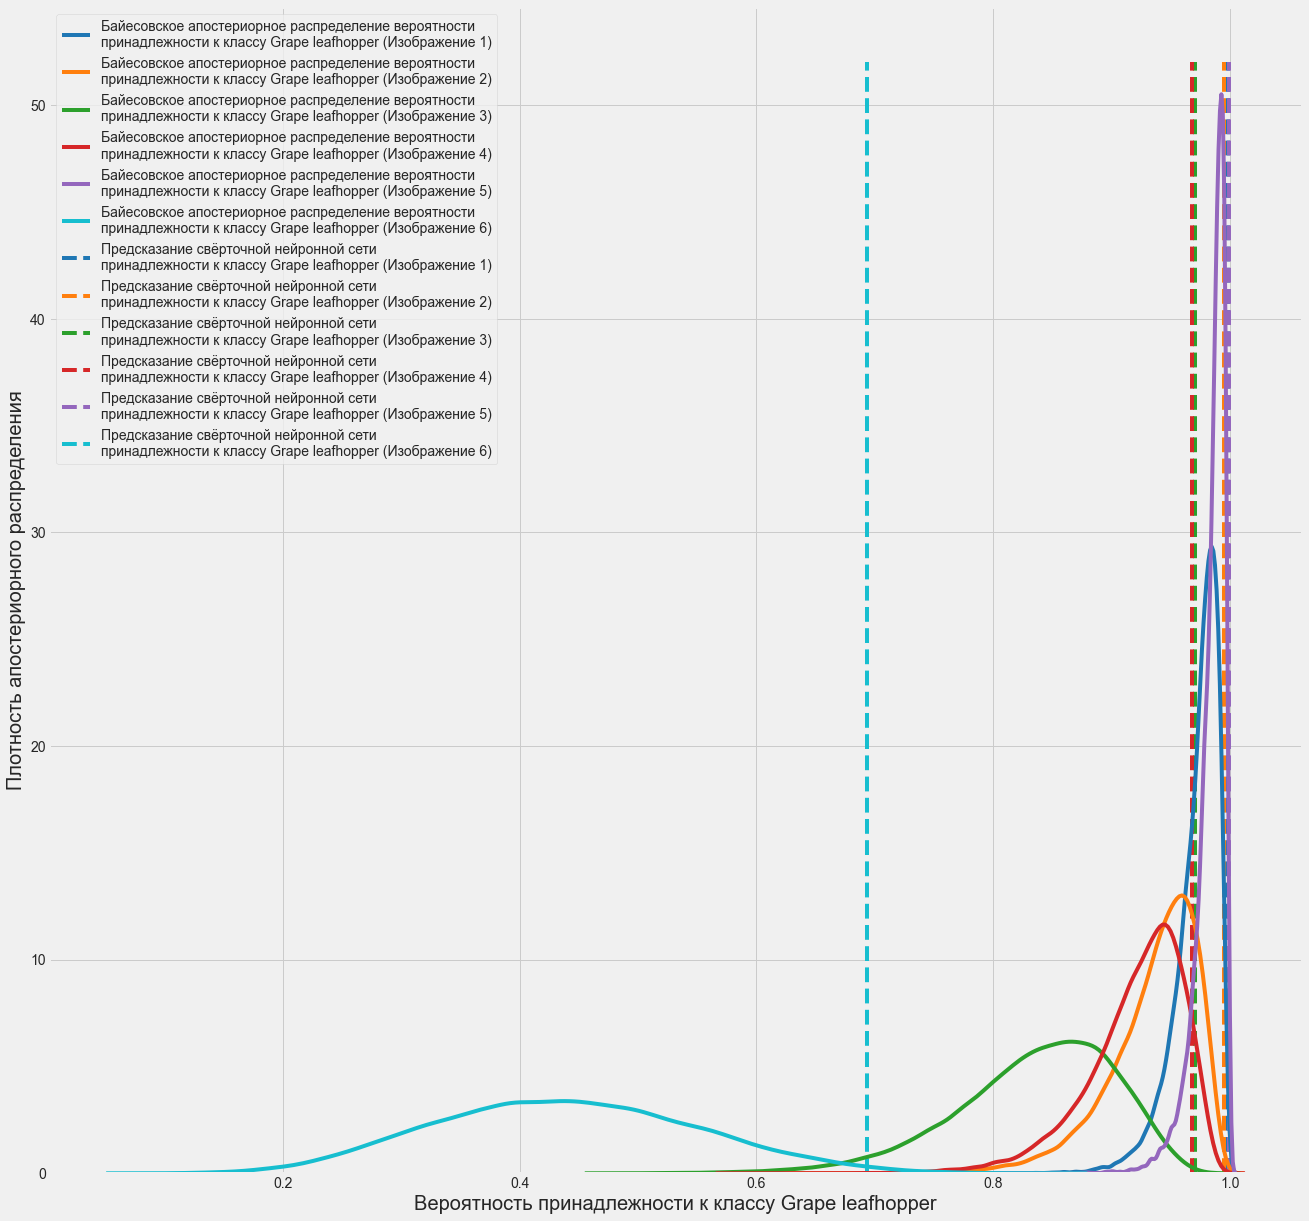

In [310]:
plt.figure(figsize = (20, 20))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Байесовское апостериорное распределение вероятности\nпринадлежности к классу Grape leafhopper (Изображение 1)', color='tab:blue')
plt.vlines(x = CNN_prediction_actual_1, ymin = 0, ymax = 52, label = 'Предсказание свёрточной нейронной сети\nпринадлежности к классу Grape leafhopper (Изображение 1)',  color='tab:blue', linestyles='--')
sns.kdeplot(bayes_actual_class_prediction_2, label = 'Байесовское апостериорное распределение вероятности\nпринадлежности к классу Grape leafhopper (Изображение 2)', color='tab:orange')
plt.vlines(x = CNN_prediction_actual_2, ymin = 0, ymax = 52, label = 'Предсказание свёрточной нейронной сети\nпринадлежности к классу Grape leafhopper (Изображение 2)', colors = 'tab:orange', linestyles='--')
sns.kdeplot(bayes_actual_class_prediction_3, label = 'Байесовское апостериорное распределение вероятности\nпринадлежности к классу Grape leafhopper (Изображение 3)', color='tab:green')
plt.vlines(x = CNN_prediction_actual_3, ymin = 0, ymax = 52, label = 'Предсказание свёрточной нейронной сети\nпринадлежности к классу Grape leafhopper (Изображение 3)', colors = 'tab:green', linestyles='--')
sns.kdeplot(bayes_actual_class_prediction_4, label = 'Байесовское апостериорное распределение вероятности\nпринадлежности к классу Grape leafhopper (Изображение 4)', color='tab:red')
plt.vlines(x = CNN_prediction_actual_4, ymin = 0, ymax = 52, label = 'Предсказание свёрточной нейронной сети\nпринадлежности к классу Grape leafhopper (Изображение 4)', colors = 'tab:red', linestyles='--')
sns.kdeplot(bayes_actual_class_prediction_5, label = 'Байесовское апостериорное распределение вероятности\nпринадлежности к классу Grape leafhopper (Изображение 5)', color='tab:purple')
plt.vlines(x = CNN_prediction_actual_5, ymin = 0, ymax = 52, label = 'Предсказание свёрточной нейронной сети\nпринадлежности к классу Grape leafhopper (Изображение 5)', colors = 'tab:purple', linestyles='--')
sns.kdeplot(bayes_actual_class_prediction_6, label = 'Байесовское апостериорное распределение вероятности\nпринадлежности к классу Grape leafhopper (Изображение 6)', color='tab:cyan')
plt.vlines(x = CNN_prediction_actual_6, ymin = 0, ymax = 52, label = 'Предсказание свёрточной нейронной сети\nпринадлежности к классу Grape leafhopper (Изображение 6)', colors = 'tab:cyan', linestyles='--')


plt.legend();
plt.xlabel('Вероятность принадлежности к классу Grape leafhopper', size = 20)
plt.ylabel('Плотность апостериорного распределения', size = 20);
#plt.title('Сравнение предсказаний', size = 15);

In [300]:
test_sample = test_values.iloc[0].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
test_sample = test_values.iloc[2].to_numpy()
bayes_actual_class_prediction_2 = get_posterior_distribution(trace4, test_sample)
test_sample = test_values.iloc[5].to_numpy()
bayes_actual_class_prediction_3 = get_posterior_distribution(trace4, test_sample)
test_sample = test_values.iloc[6].to_numpy()
bayes_actual_class_prediction_4 = get_posterior_distribution(trace4, test_sample)
test_sample = test_values.iloc[8].to_numpy()
bayes_actual_class_prediction_5 = get_posterior_distribution(trace4, test_sample)
test_sample = test_values.iloc[9].to_numpy()
bayes_actual_class_prediction_6 = get_posterior_distribution(trace4, test_sample)

In [350]:
CNN_prediction_actual_1 = predictions[0]
CNN_prediction_actual_2 = predictions[2]
CNN_prediction_actual_3 = predictions[5]
CNN_prediction_actual_4 = predictions[6]
CNN_prediction_actual_5 = predictions[8]
CNN_prediction_actual_6 = predictions[9]

IndexError: index 9 is out of bounds for axis 0 with size 9

In [351]:
test_sample = test_values.iloc[11].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
bayes_predicted_class_prediction_1 = get_posterior_distribution(trace5, test_sample)
predictions = test_data['prediction 4'].to_numpy()
CNN_prediction_actual_1 = predictions[11]
predictions = test_data['prediction 5'].to_numpy()
CNN_prediction_predicted_1 = predictions[11]

In [352]:
predictions = test_data['prediction 4'].to_numpy()

In [353]:
print(CNN_prediction_actual_1)
print(CNN_prediction_predicted_1)

0.69316196
0.07682689


In [354]:
print(bayes_actual_class_prediction_1.mean())
print(bayes_predicted_class_prediction_1.mean())

0.439222322565571
0.03527130570490358


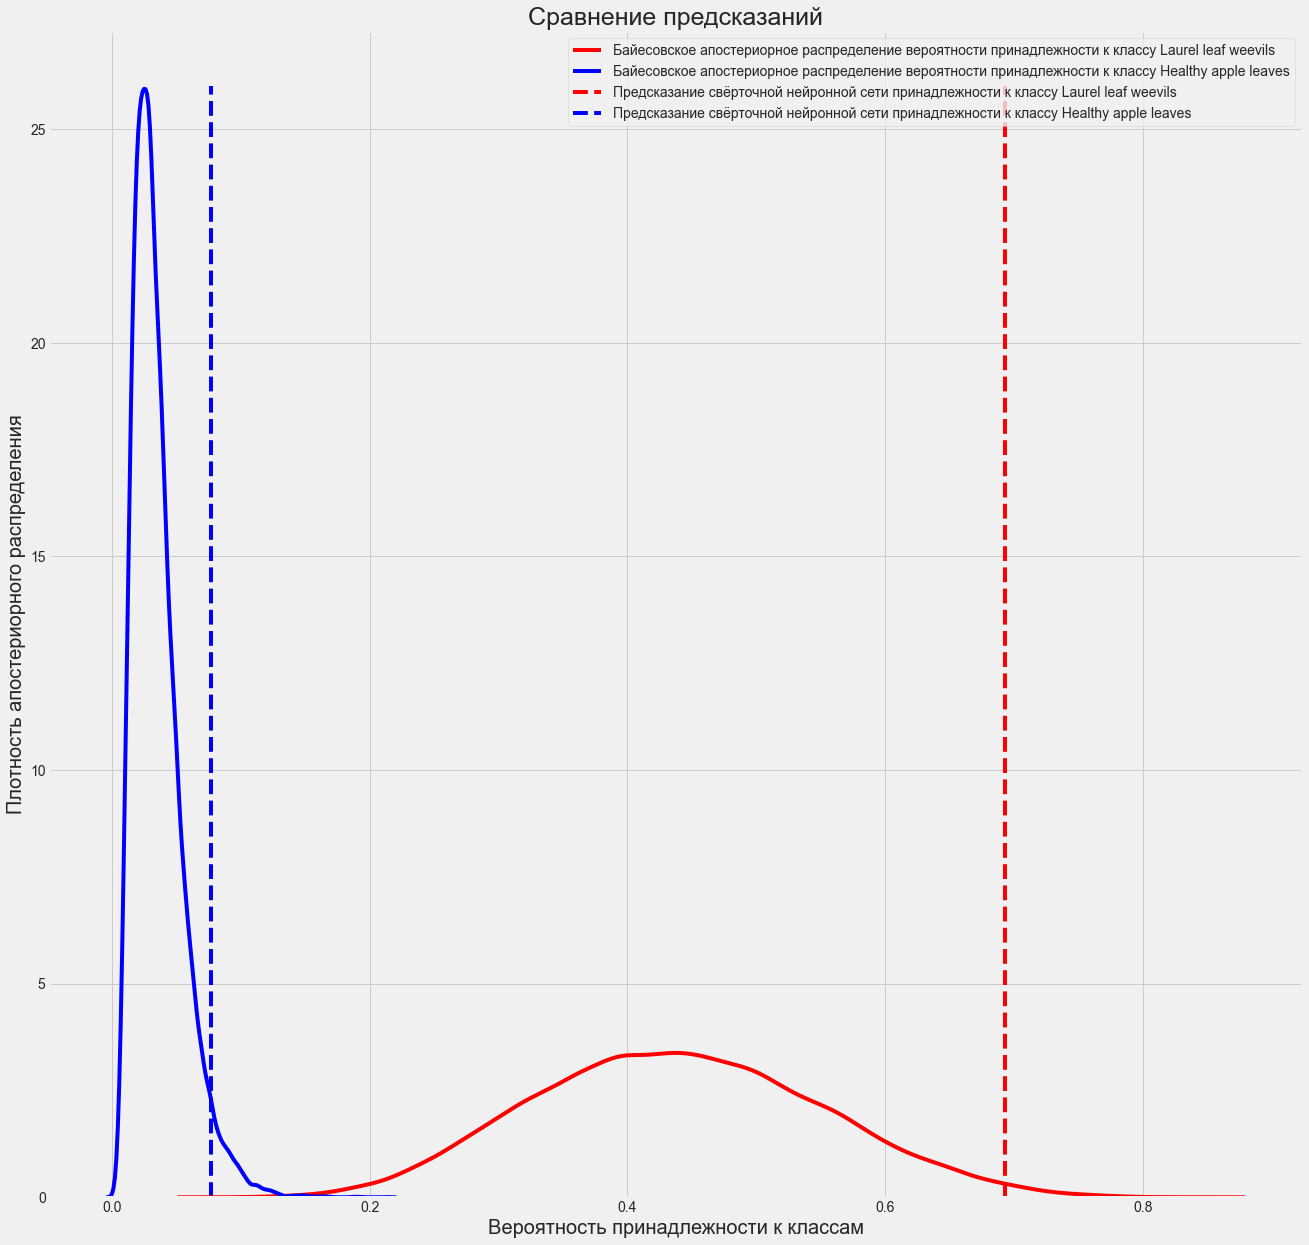

In [357]:
plt.figure(figsize = (20, 20))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Байесовское апостериорное распределение вероятности принадлежности к классу Laurel leaf weevils', color='r')
plt.vlines(x = CNN_prediction_actual_1, ymin = 0, ymax = 26, label = 'Предсказание свёрточной нейронной сети принадлежности к классу Laurel leaf weevils', colors = 'r', linestyles='--')

sns.kdeplot(bayes_predicted_class_prediction_1, label = 'Байесовское апостериорное распределение вероятности принадлежности к классу Healthy apple leaves', color='b')
plt.vlines(x = CNN_prediction_predicted_1, ymin = 0, ymax = 26, label = 'Предсказание свёрточной нейронной сети принадлежности к классу Healthy apple leaves', colors = 'b', linestyles='--')

plt.legend();
plt.xlabel('Вероятность принадлежности к классам', size = 20)
plt.ylabel('Плотность апостериорного распределения', size = 20);
plt.title('Сравнение предсказаний', size = 25);

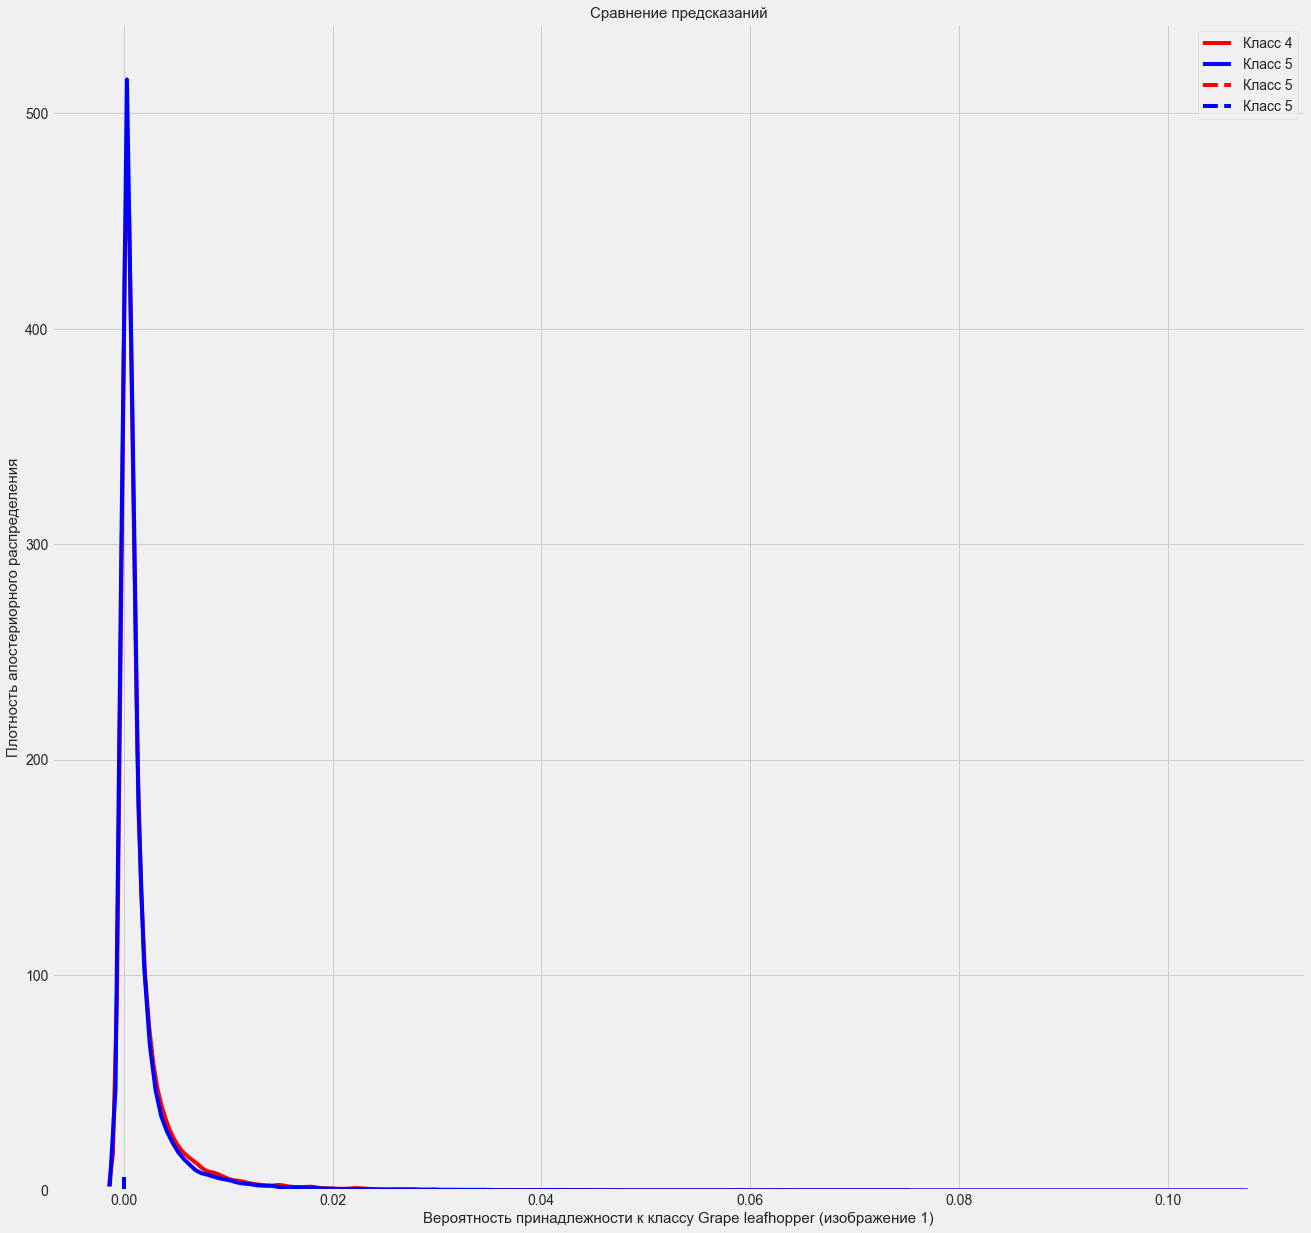

In [334]:
test_sample = test_values.iloc[2].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
bayes_predicted_class_prediction_1 = get_posterior_distribution(trace5, test_sample)
predictions = test_data['prediction 4'].to_numpy()
CNN_prediction_actual_1 = predictions[2]
predictions = test_data['prediction 5'].to_numpy()
CNN_prediction_predicted_1 = predictions[2]

plt.figure(figsize = (20, 20))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Класс 4', color='r')
plt.vlines(x = CNN_prediction_actual_1, ymin = 0, ymax = 6, label = 'Класс 5', colors = 'r', linestyles='--')

sns.kdeplot(bayes_predicted_class_prediction_1, label = 'Класс 5', color='b')
plt.vlines(x = CNN_prediction_predicted_1, ymin = 0, ymax = 6, label = 'Класс 5', colors = 'b', linestyles='--')

plt.legend();
plt.xlabel('Вероятность принадлежности к классу Grape leafhopper (изображение 1)', size = 15)
plt.ylabel('Плотность апостериорного распределения', size = 15);
plt.title('Сравнение предсказаний', size = 15);

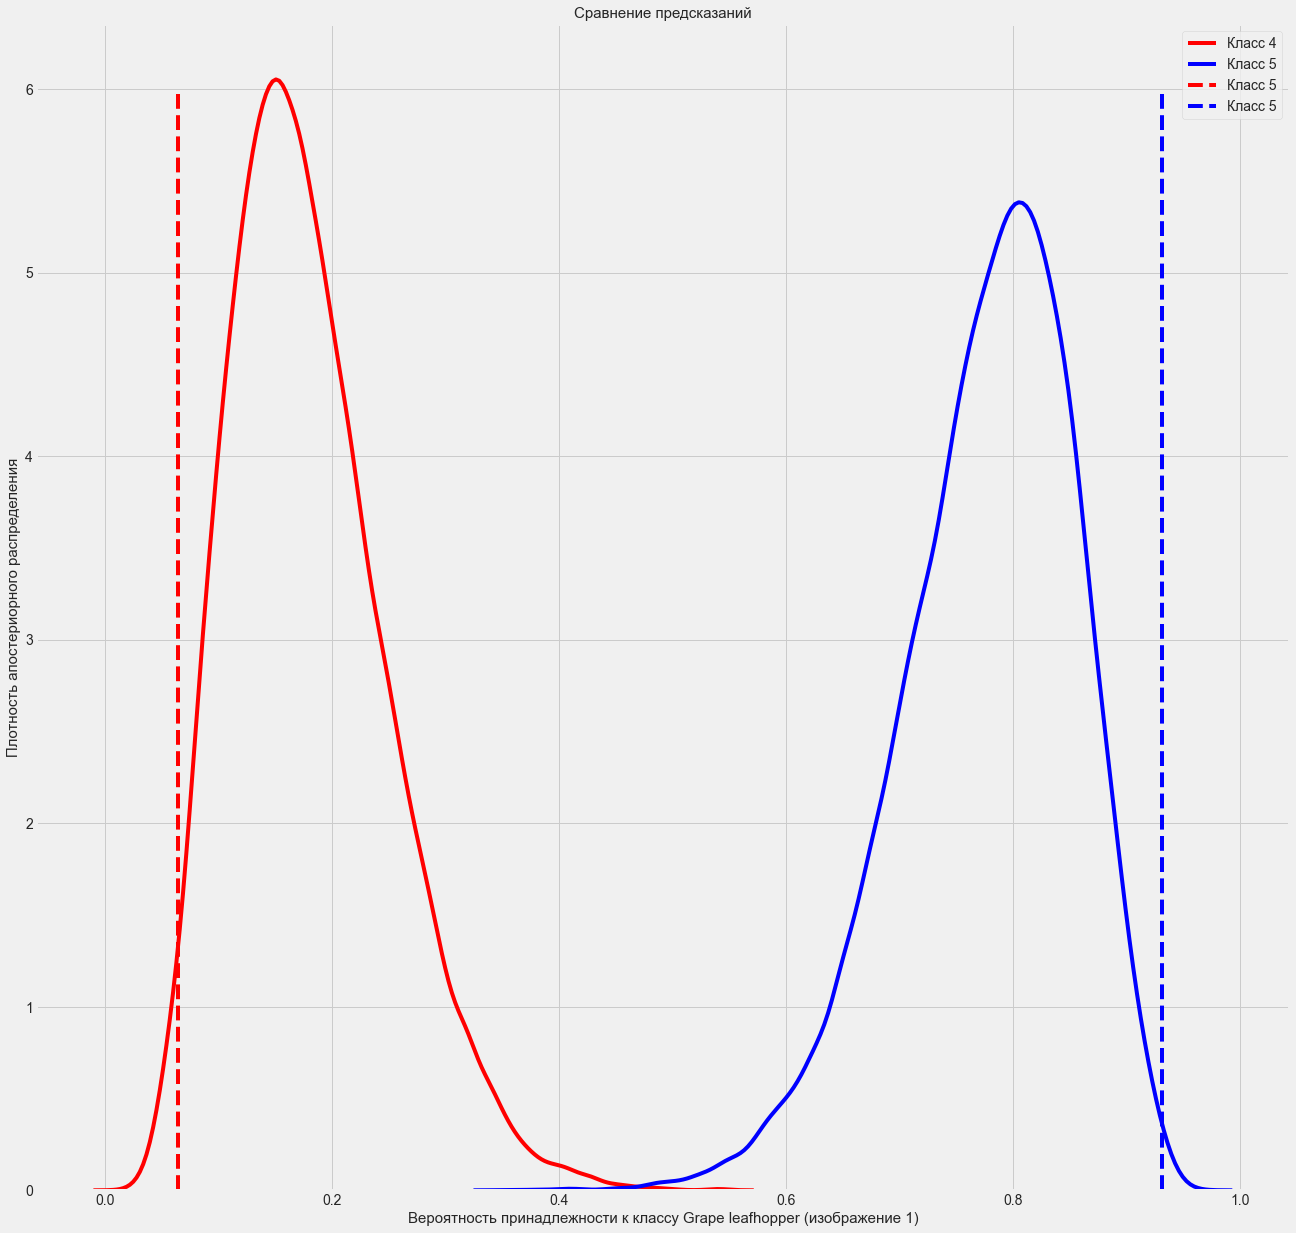

In [115]:
test_sample = test_values.iloc[2].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
bayes_predicted_class_prediction_1 = get_posterior_distribution(trace5, test_sample)
predictions = test_data['prediction 4'].to_numpy()
CNN_prediction_actual_1 = predictions[2]
predictions = test_data['prediction 5'].to_numpy()
CNN_prediction_predicted_1 = predictions[2]

plt.figure(figsize = (20, 20))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Класс 4', color='r')
plt.vlines(x = CNN_prediction_actual_1, ymin = 0, ymax = 6, label = 'Класс 5', colors = 'r', linestyles='--')

sns.kdeplot(bayes_predicted_class_prediction_1, label = 'Класс 5', color='b')
plt.vlines(x = CNN_prediction_predicted_1, ymin = 0, ymax = 6, label = 'Класс 5', colors = 'b', linestyles='--')

plt.legend();
plt.xlabel('Вероятность принадлежности к классу Grape leafhopper (изображение 1)', size = 15)
plt.ylabel('Плотность апостериорного распределения', size = 15);
plt.title('Сравнение предсказаний', size = 15);

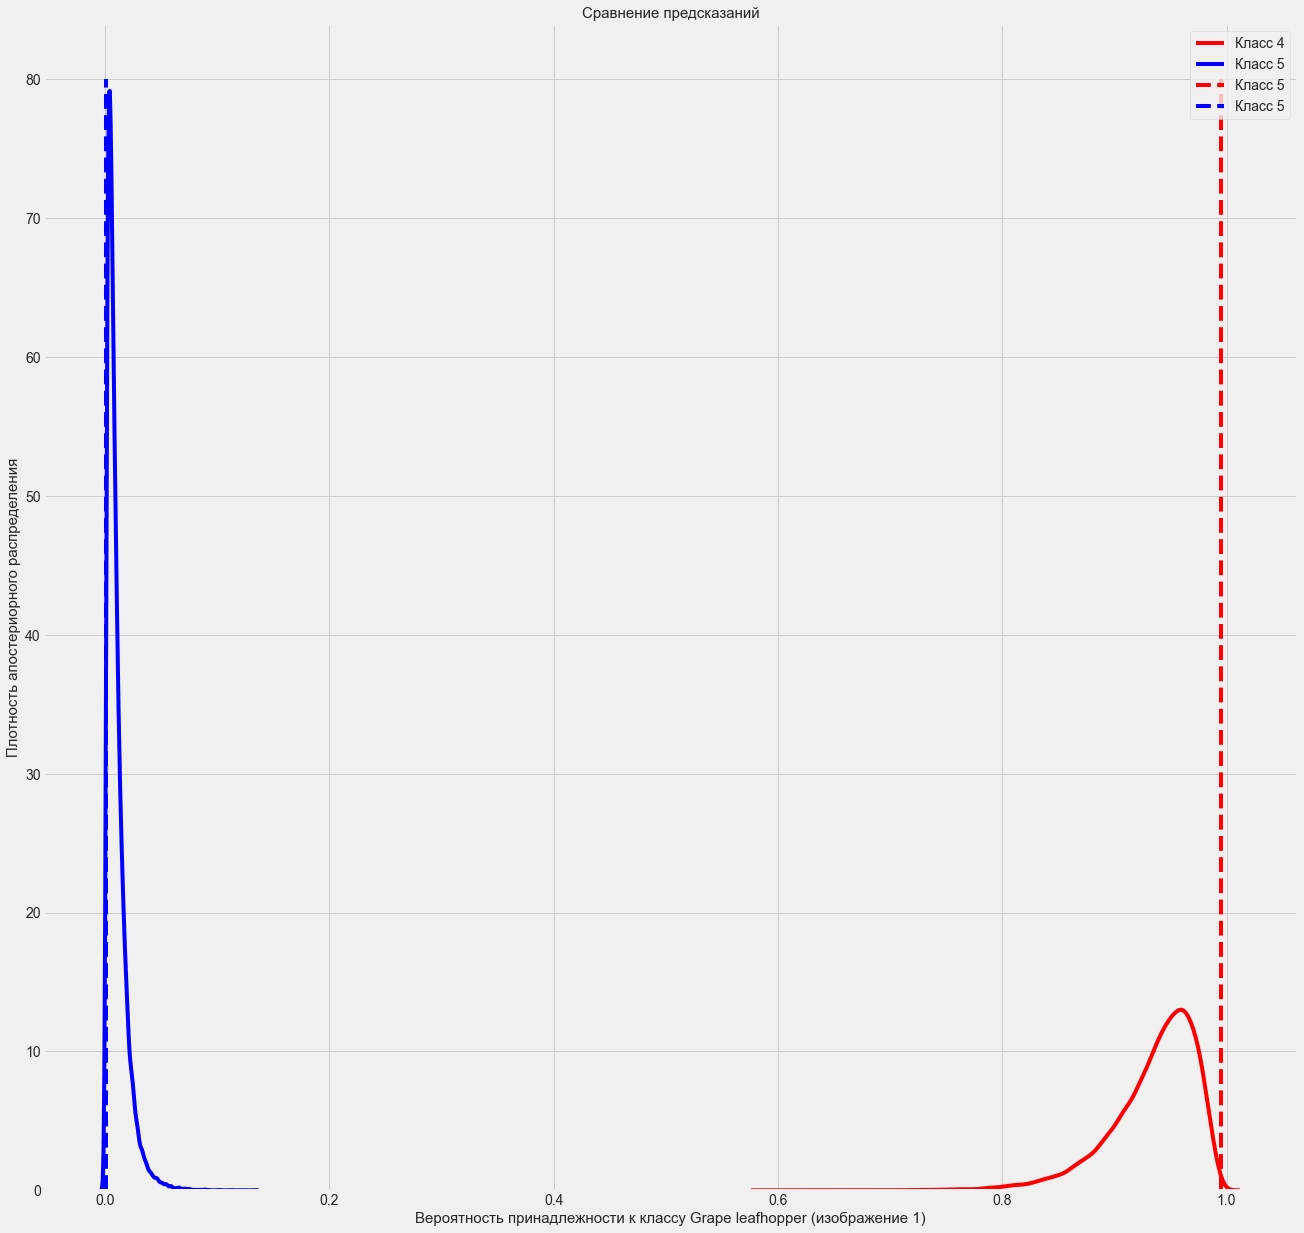

In [116]:
test_sample = test_values.iloc[3].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
bayes_predicted_class_prediction_1 = get_posterior_distribution(trace5, test_sample)
predictions = test_data['prediction 4'].to_numpy()
CNN_prediction_actual_1 = predictions[3]
predictions = test_data['prediction 5'].to_numpy()
CNN_prediction_predicted_1 = predictions[3]

plt.figure(figsize = (20, 20))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Класс 4', color='r')
plt.vlines(x = CNN_prediction_actual_1, ymin = 0, ymax = 80, label = 'Класс 5', colors = 'r', linestyles='--')

sns.kdeplot(bayes_predicted_class_prediction_1, label = 'Класс 5', color='b')
plt.vlines(x = CNN_prediction_predicted_1, ymin = 0, ymax = 80, label = 'Класс 5', colors = 'b', linestyles='--')

plt.legend();
plt.xlabel('Вероятность принадлежности к классу Grape leafhopper (изображение 1)', size = 15)
plt.ylabel('Плотность апостериорного распределения', size = 15);
plt.title('Сравнение предсказаний', size = 15);

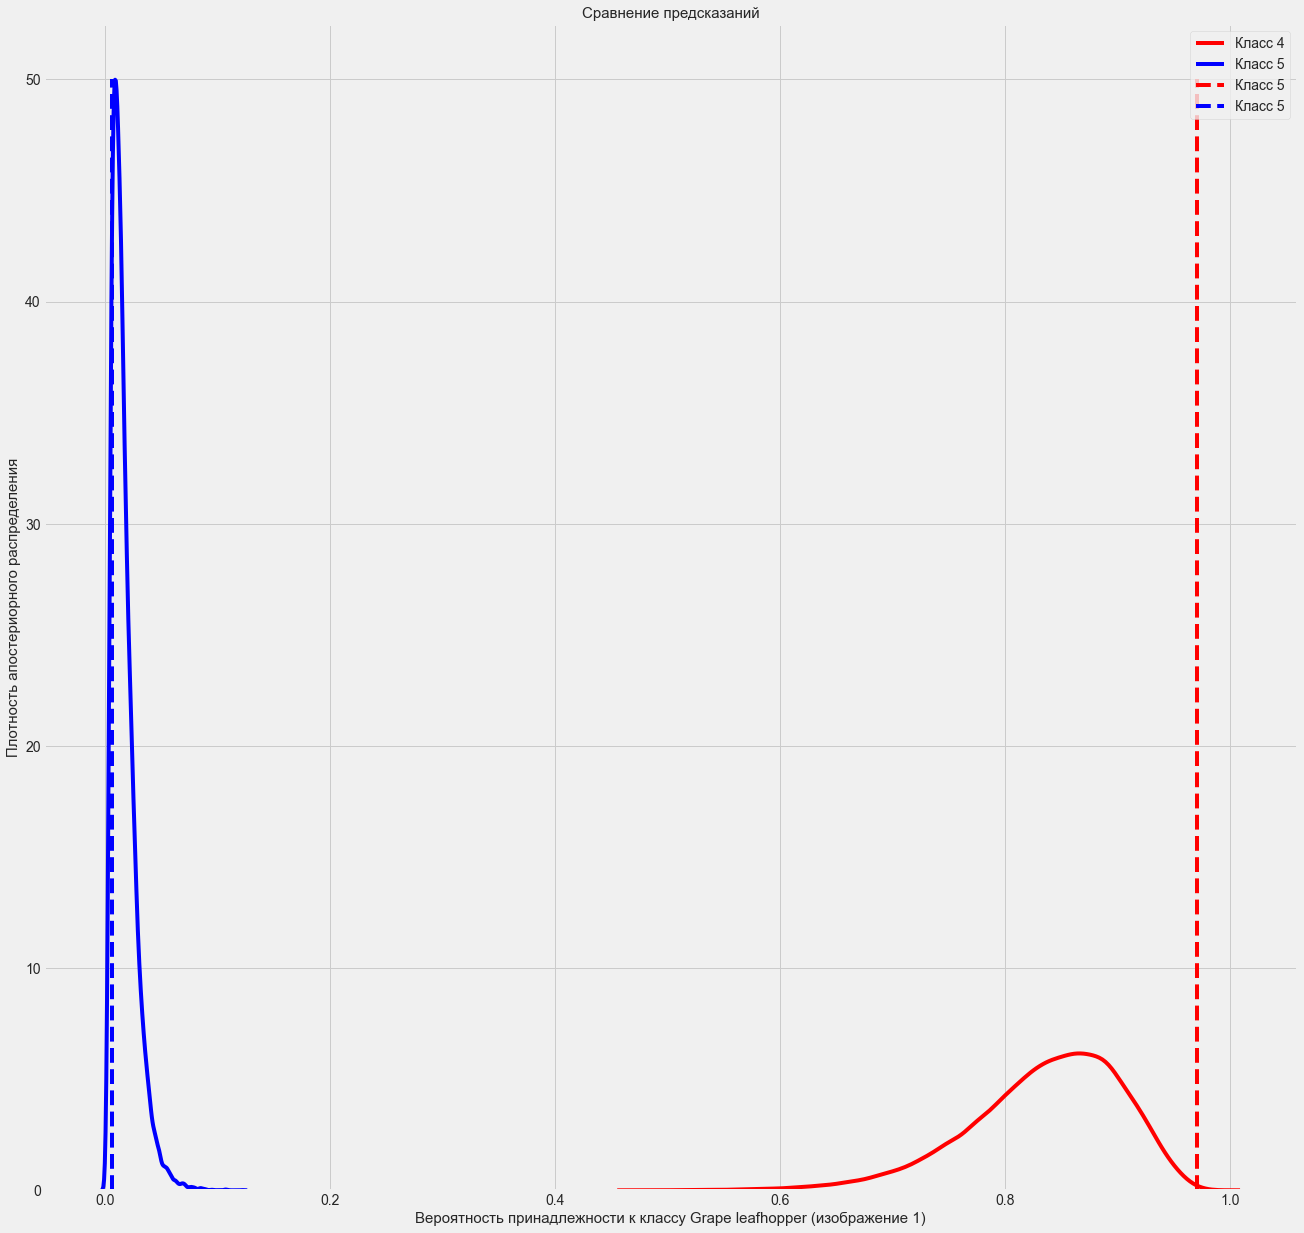

In [118]:
test_sample = test_values.iloc[4].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
bayes_predicted_class_prediction_1 = get_posterior_distribution(trace5, test_sample)
predictions = test_data['prediction 4'].to_numpy()
CNN_prediction_actual_1 = predictions[4]
predictions = test_data['prediction 5'].to_numpy()
CNN_prediction_predicted_1 = predictions[4]

plt.figure(figsize = (20, 20))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Класс 4', color='r')
plt.vlines(x = CNN_prediction_actual_1, ymin = 0, ymax = 50, label = 'Класс 5', colors = 'r', linestyles='--')

sns.kdeplot(bayes_predicted_class_prediction_1, label = 'Класс 5', color='b')
plt.vlines(x = CNN_prediction_predicted_1, ymin = 0, ymax = 50, label = 'Класс 5', colors = 'b', linestyles='--')

plt.legend();
plt.xlabel('Вероятность принадлежности к классу Grape leafhopper (изображение 1)', size = 15)
plt.ylabel('Плотность апостериорного распределения', size = 15);
plt.title('Сравнение предсказаний', size = 15);

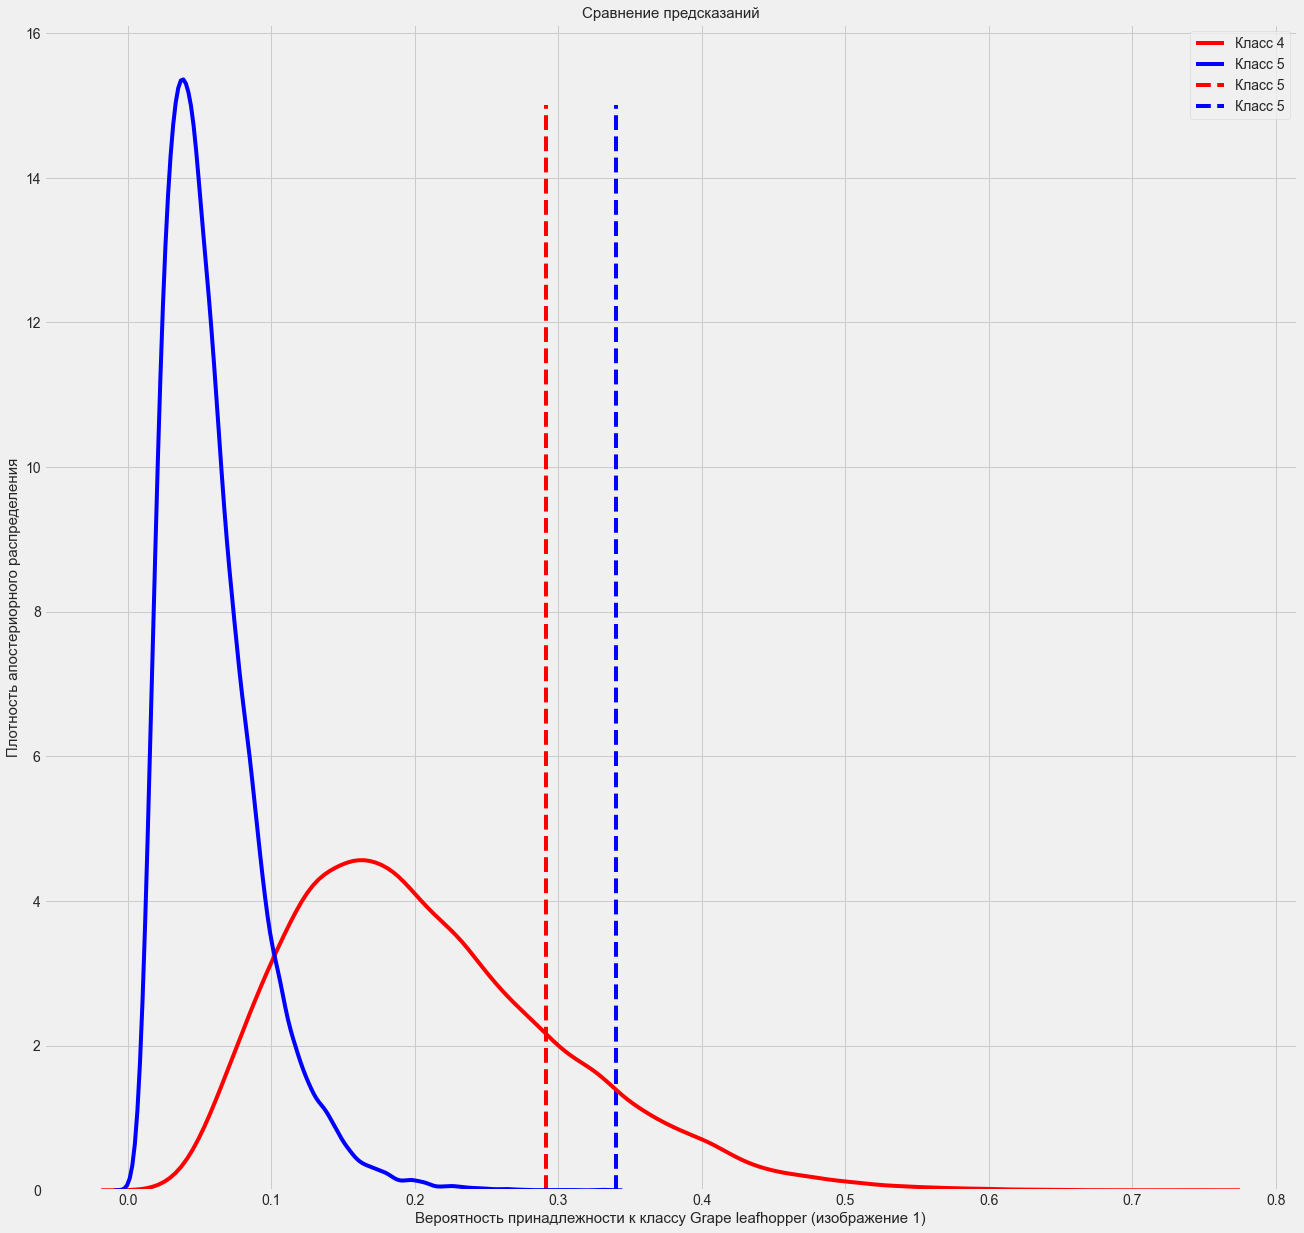

In [121]:
test_sample = test_values.iloc[5].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
bayes_predicted_class_prediction_1 = get_posterior_distribution(trace5, test_sample)
predictions = test_data['prediction 4'].to_numpy()
CNN_prediction_actual_1 = predictions[5]
predictions = test_data['prediction 5'].to_numpy()
CNN_prediction_predicted_1 = predictions[5]

plt.figure(figsize = (20, 20))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Класс 4', color='r')
plt.vlines(x = CNN_prediction_actual_1, ymin = 0, ymax = 15, label = 'Класс 5', colors = 'r', linestyles='--')

sns.kdeplot(bayes_predicted_class_prediction_1, label = 'Класс 5', color='b')
plt.vlines(x = CNN_prediction_predicted_1, ymin = 0, ymax = 15, label = 'Класс 5', colors = 'b', linestyles='--')

plt.legend();
plt.xlabel('Вероятность принадлежности к классу Grape leafhopper (изображение 1)', size = 15)
plt.ylabel('Плотность апостериорного распределения', size = 15);
plt.title('Сравнение предсказаний', size = 15);

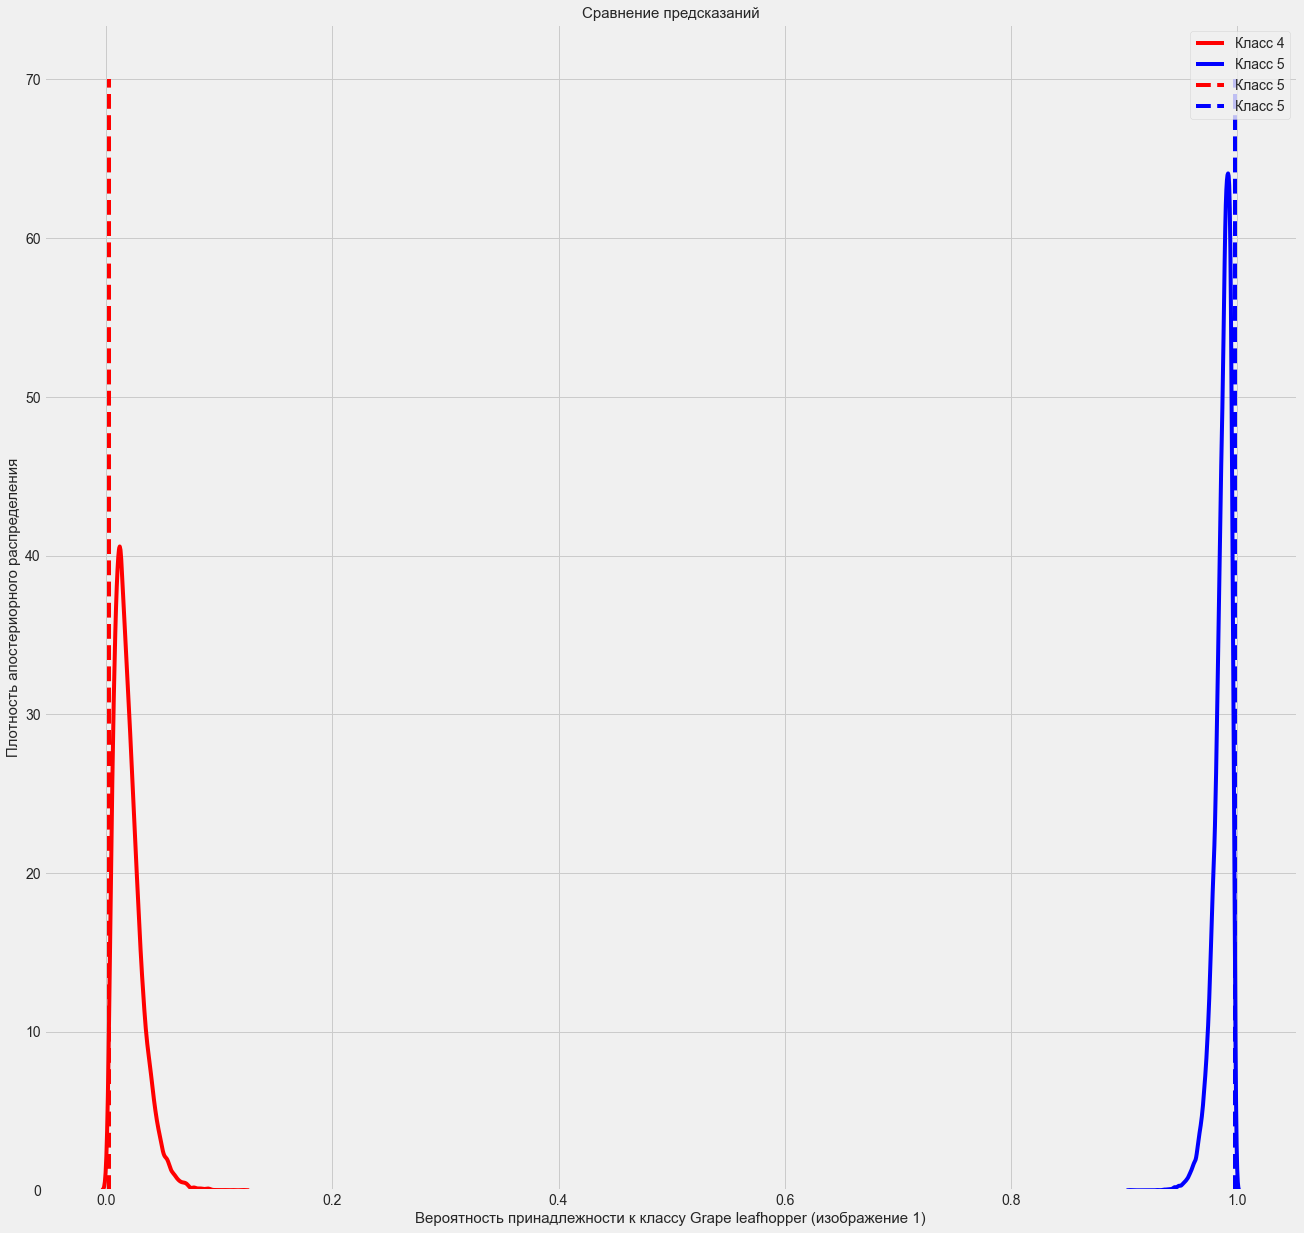

In [123]:
test_sample = test_values.iloc[6].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
bayes_predicted_class_prediction_1 = get_posterior_distribution(trace5, test_sample)
predictions = test_data['prediction 4'].to_numpy()
CNN_prediction_actual_1 = predictions[6]
predictions = test_data['prediction 5'].to_numpy()
CNN_prediction_predicted_1 = predictions[6]

plt.figure(figsize = (20, 20))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Класс 4', color='r')
plt.vlines(x = CNN_prediction_actual_1, ymin = 0, ymax = 70, label = 'Класс 5', colors = 'r', linestyles='--')

sns.kdeplot(bayes_predicted_class_prediction_1, label = 'Класс 5', color='b')
plt.vlines(x = CNN_prediction_predicted_1, ymin = 0, ymax = 70, label = 'Класс 5', colors = 'b', linestyles='--')

plt.legend();
plt.xlabel('Вероятность принадлежности к классу Grape leafhopper (изображение 1)', size = 15)
plt.ylabel('Плотность апостериорного распределения', size = 15);
plt.title('Сравнение предсказаний', size = 15);

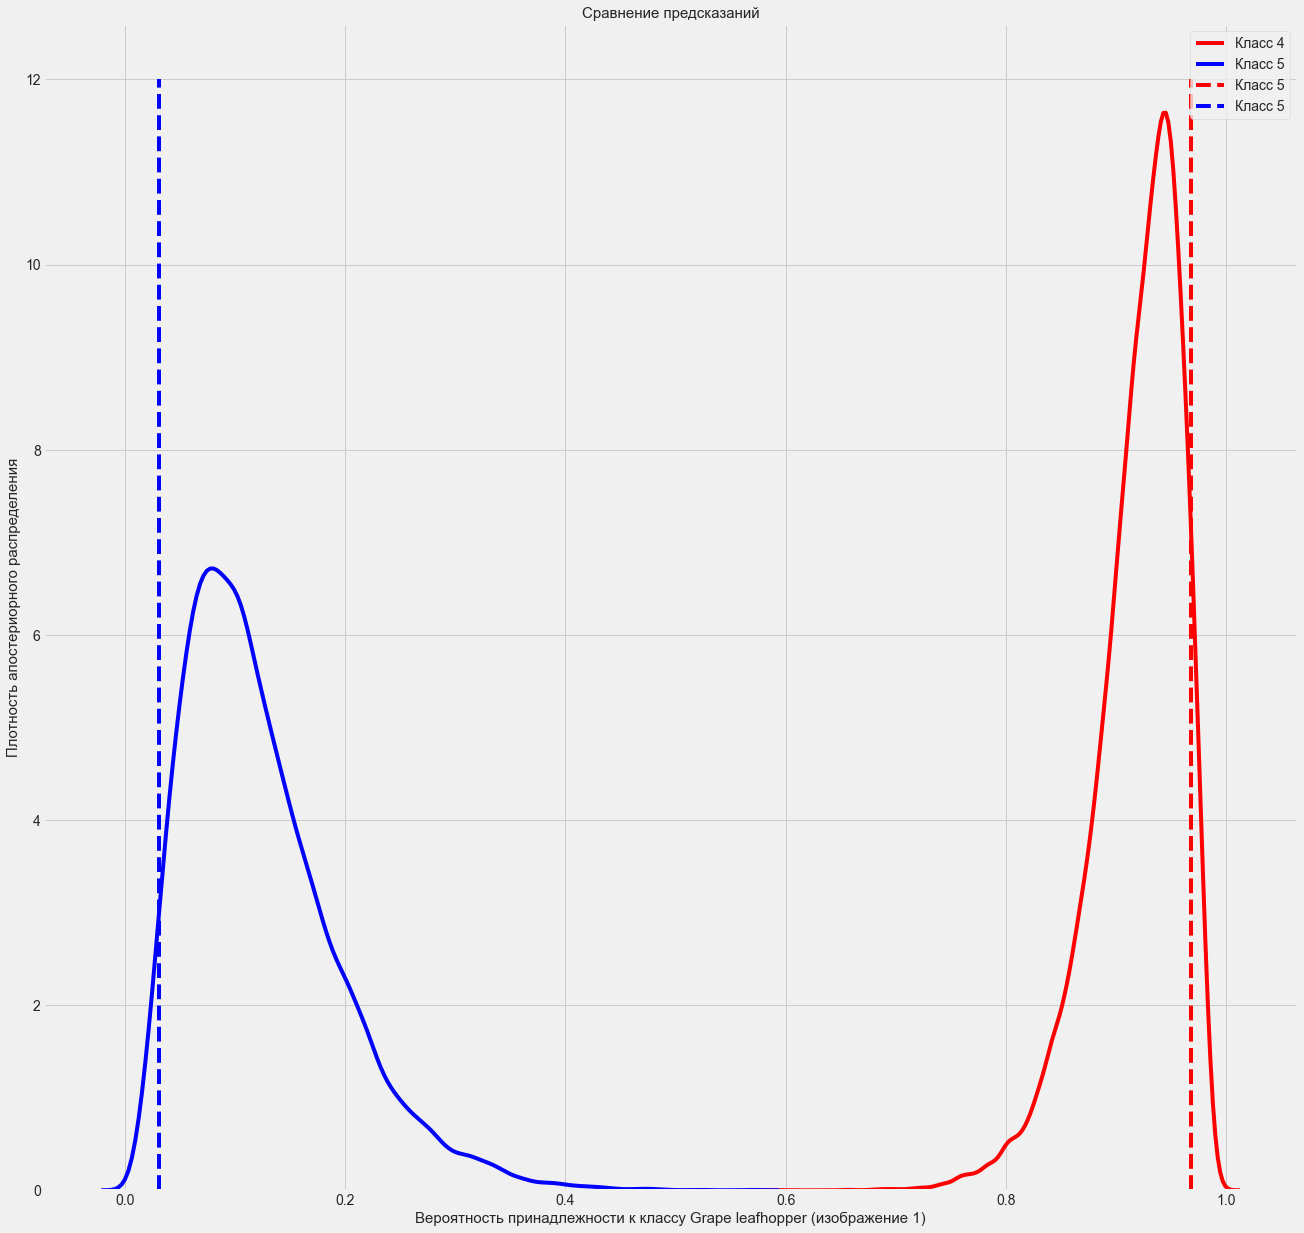

In [125]:
test_sample = test_values.iloc[7].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
bayes_predicted_class_prediction_1 = get_posterior_distribution(trace5, test_sample)
predictions = test_data['prediction 4'].to_numpy()
CNN_prediction_actual_1 = predictions[7]
predictions = test_data['prediction 5'].to_numpy()
CNN_prediction_predicted_1 = predictions[7]

plt.figure(figsize = (20, 20))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Класс 4', color='r')
plt.vlines(x = CNN_prediction_actual_1, ymin = 0, ymax = 12, label = 'Класс 5', colors = 'r', linestyles='--')

sns.kdeplot(bayes_predicted_class_prediction_1, label = 'Класс 5', color='b')
plt.vlines(x = CNN_prediction_predicted_1, ymin = 0, ymax = 12, label = 'Класс 5', colors = 'b', linestyles='--')

plt.legend();
plt.xlabel('Вероятность принадлежности к классу Grape leafhopper (изображение 1)', size = 15)
plt.ylabel('Плотность апостериорного распределения', size = 15);
plt.title('Сравнение предсказаний', size = 15);

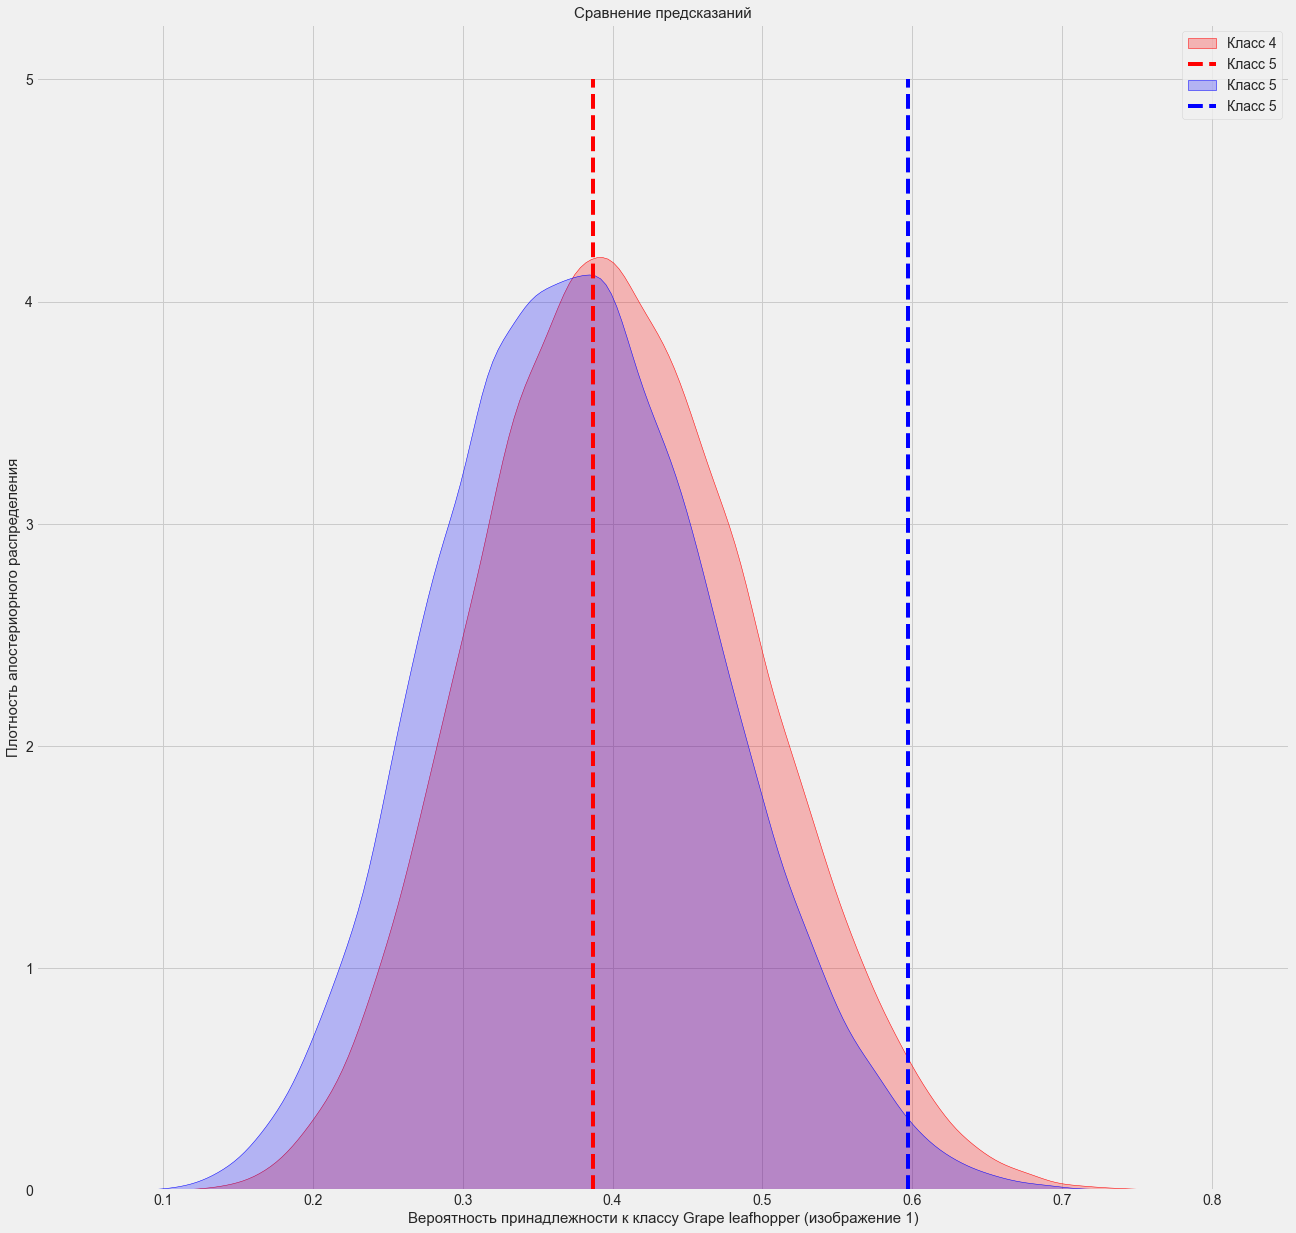

In [154]:
test_sample = test_values.iloc[8].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
bayes_predicted_class_prediction_1 = get_posterior_distribution(trace5, test_sample)
predictions = test_data['prediction 4'].to_numpy()
CNN_prediction_actual_1 = predictions[8]
predictions = test_data['prediction 5'].to_numpy()
CNN_prediction_predicted_1 = predictions[8]

plt.figure(figsize = (20, 20))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Класс 4', color='r', fill=True)
plt.vlines(x = CNN_prediction_actual_1, ymin = 0, ymax = 5, label = 'Класс 5', colors = 'r', linestyles='--')

sns.kdeplot(bayes_predicted_class_prediction_1, label = 'Класс 5', color='b', fill=True)
plt.vlines(x = CNN_prediction_predicted_1, ymin = 0, ymax = 5, label = 'Класс 5', colors = 'b', linestyles='--')

plt.legend();
plt.xlabel('Вероятность принадлежности к классу Grape leafhopper (изображение 1)', size = 15)
plt.ylabel('Плотность апостериорного распределения', size = 15);
plt.title('Сравнение предсказаний', size = 15);

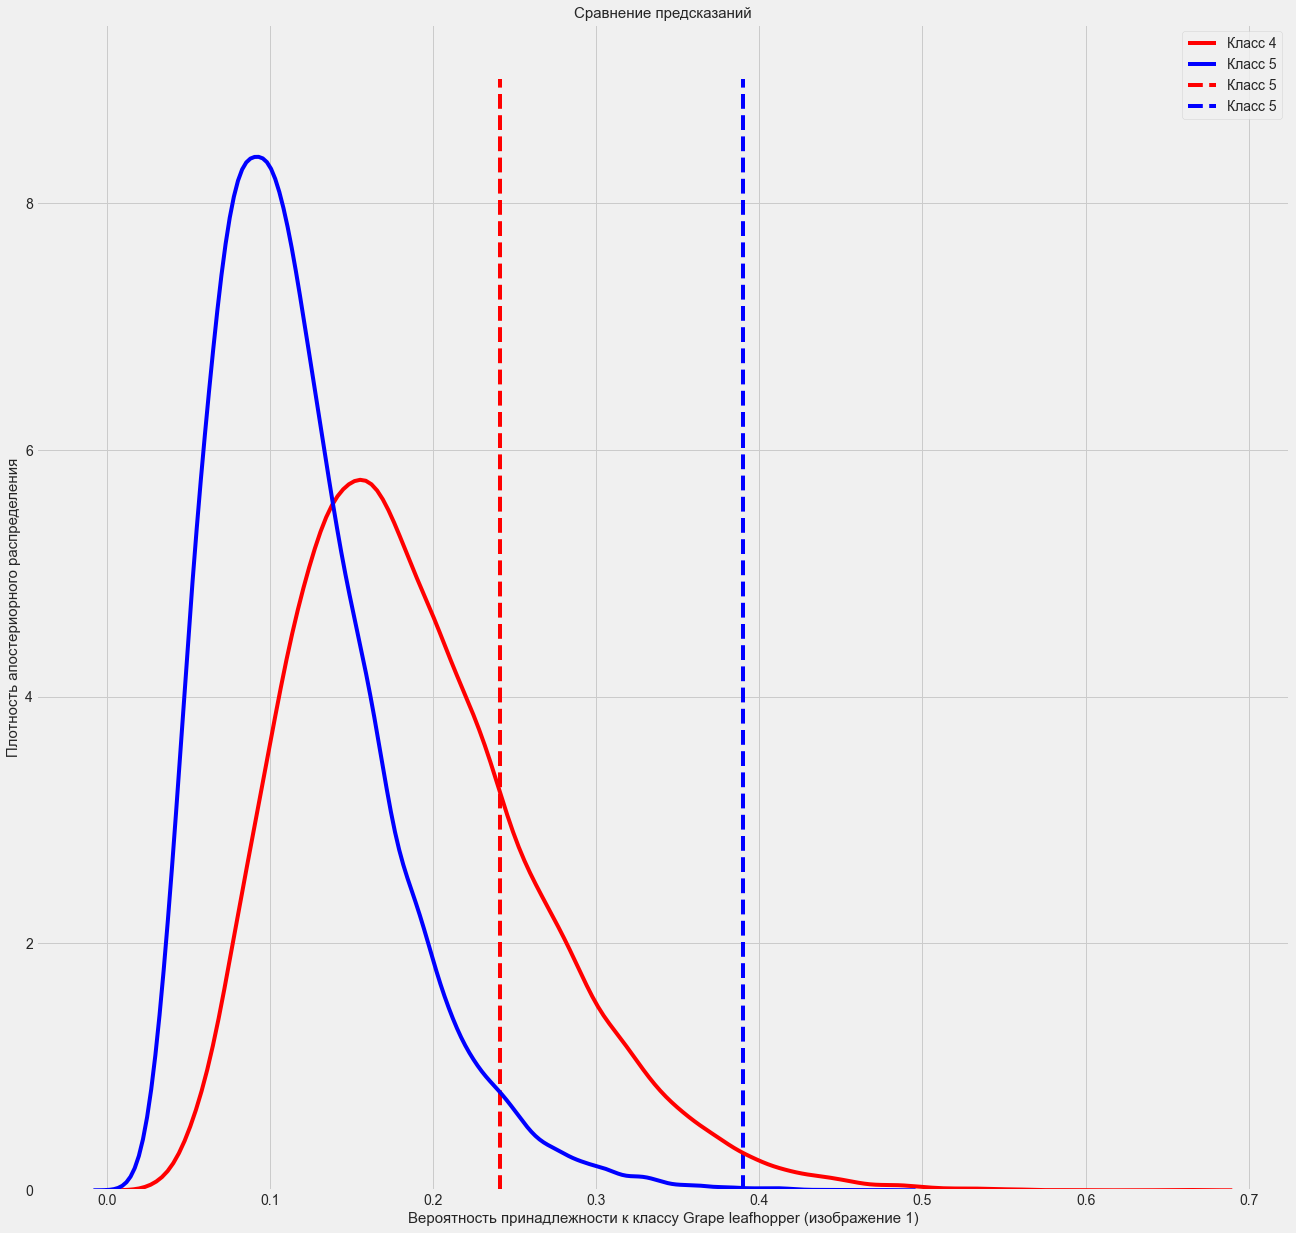

In [129]:
test_sample = test_values.iloc[9].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
bayes_predicted_class_prediction_1 = get_posterior_distribution(trace5, test_sample)
predictions = test_data['prediction 4'].to_numpy()
CNN_prediction_actual_1 = predictions[9]
predictions = test_data['prediction 5'].to_numpy()
CNN_prediction_predicted_1 = predictions[9]

plt.figure(figsize = (20, 20))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Класс 4', color='r')
plt.vlines(x = CNN_prediction_actual_1, ymin = 0, ymax = 9, label = 'Класс 5', colors = 'r', linestyles='--')

sns.kdeplot(bayes_predicted_class_prediction_1, label = 'Класс 5', color='b')
plt.vlines(x = CNN_prediction_predicted_1, ymin = 0, ymax = 9, label = 'Класс 5', colors = 'b', linestyles='--')

plt.legend();
plt.xlabel('Вероятность принадлежности к классу Grape leafhopper (изображение 1)', size = 15)
plt.ylabel('Плотность апостериорного распределения', size = 15);
plt.title('Сравнение предсказаний', size = 15);

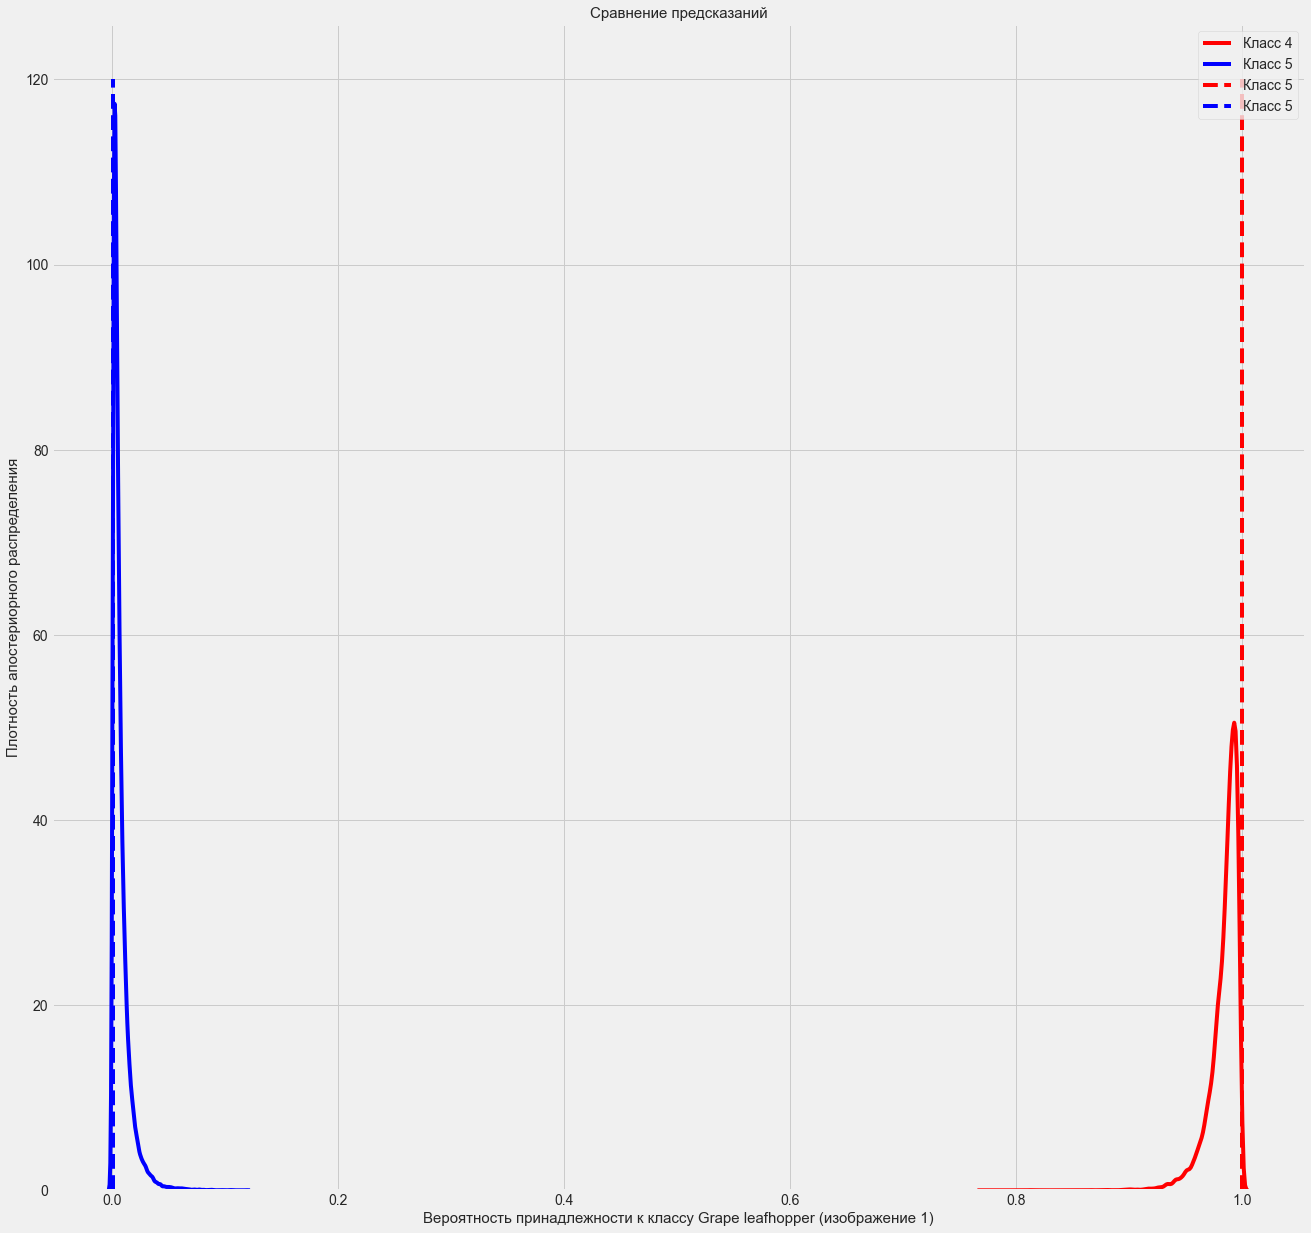

In [131]:
test_sample = test_values.iloc[10].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
bayes_predicted_class_prediction_1 = get_posterior_distribution(trace5, test_sample)
predictions = test_data['prediction 4'].to_numpy()
CNN_prediction_actual_1 = predictions[10]
predictions = test_data['prediction 5'].to_numpy()
CNN_prediction_predicted_1 = predictions[10]

plt.figure(figsize = (20, 20))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Класс 4', color='r')
plt.vlines(x = CNN_prediction_actual_1, ymin = 0, ymax = 120, label = 'Класс 5', colors = 'r', linestyles='--')

sns.kdeplot(bayes_predicted_class_prediction_1, label = 'Класс 5', color='b')
plt.vlines(x = CNN_prediction_predicted_1, ymin = 0, ymax = 120, label = 'Класс 5', colors = 'b', linestyles='--')

plt.legend();
plt.xlabel('Вероятность принадлежности к классу Grape leafhopper (изображение 1)', size = 15)
plt.ylabel('Плотность апостериорного распределения', size = 15);
plt.title('Сравнение предсказаний', size = 15);

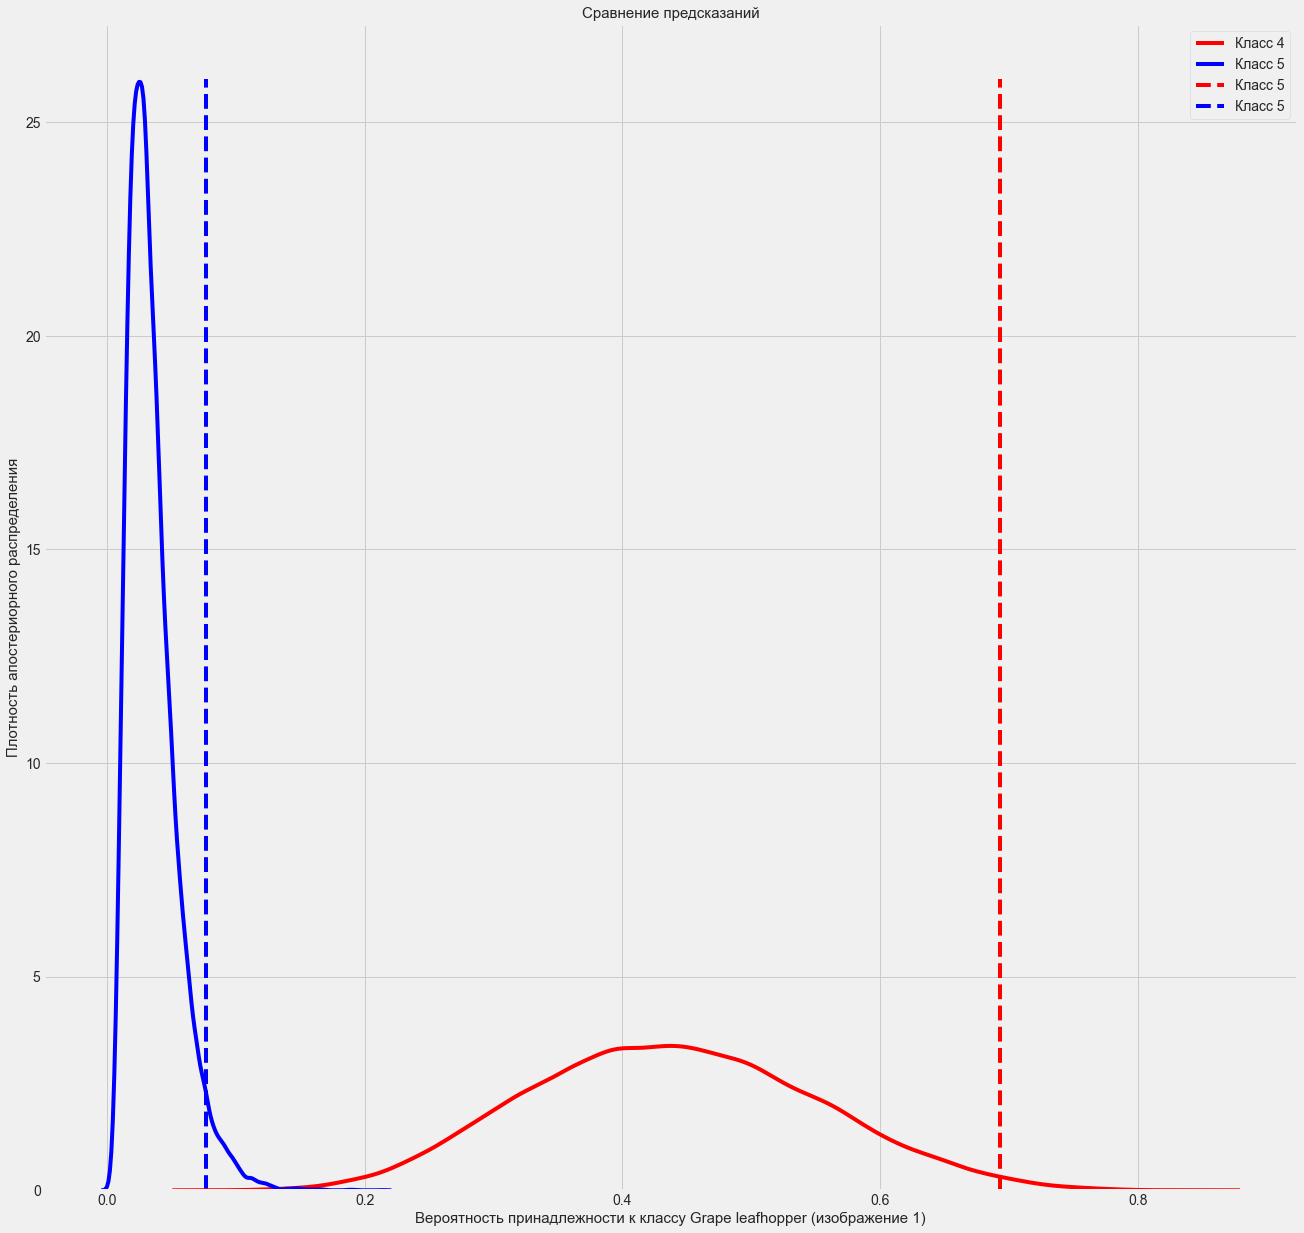

In [133]:
test_sample = test_values.iloc[11].to_numpy()
bayes_actual_class_prediction_1 = get_posterior_distribution(trace4, test_sample)
bayes_predicted_class_prediction_1 = get_posterior_distribution(trace5, test_sample)
predictions = test_data['prediction 4'].to_numpy()
CNN_prediction_actual_1 = predictions[11]
predictions = test_data['prediction 5'].to_numpy()
CNN_prediction_predicted_1 = predictions[11]

plt.figure(figsize = (20, 20))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Класс 4', color='r')
plt.vlines(x = CNN_prediction_actual_1, ymin = 0, ymax = 26, label = 'Класс 5', colors = 'r', linestyles='--')

sns.kdeplot(bayes_predicted_class_prediction_1, label = 'Класс 5', color='b')
plt.vlines(x = CNN_prediction_predicted_1, ymin = 0, ymax = 26, label = 'Класс 5', colors = 'b', linestyles='--')

plt.legend();
plt.xlabel('Вероятность принадлежности к классу Grape leafhopper (изображение 1)', size = 15)
plt.ylabel('Плотность апостериорного распределения', size = 15);
plt.title('Сравнение предсказаний', size = 15);

In [ ]:
predictions = test_data['prediction 4'].to_numpy()
CNN_prediction_actual = predictions[1]
predictions = test_data['prediction 5'].to_numpy()
CNN_prediction_predicted = predictions[1]

In [96]:
print('Вероятность, выданная СНС: ', CNN_prediction)
print('Среднее значение плотности апостериорной вероятности распределения:', bayes_prediction.mean())

Вероятность, выданная СНС:  0.9683202
Среднее значение плотности апостериорной вероятности распределения: 0.920320262839452


(30000,)

In [322]:
test_data

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,prediction 1,prediction 2,prediction 3,prediction 4,prediction 5,prediction 6,prediction 7,prediction 8,prediction 9,prediction 10
164,6.516371,0.000000,0.000000,4.940422,0.000000,3.771844,9.812037,6.605825,0.0,6.222055,...,1.370000e-06,1.630000e-06,1.650000e-09,1.300000e-09,3.310000e-06,1.640000e-10,4.140000e-06,0.999986,1.480000e-08,2.810000e-06
165,9.398789,0.000000,0.000000,7.119770,0.000000,5.879583,13.422536,9.783401,0.0,9.040191,...,2.070000e-09,4.080000e-09,1.540000e-13,2.500000e-13,1.450000e-08,8.000000e-15,3.050000e-08,1.000000,6.250000e-12,9.430000e-09
166,6.918166,0.000000,0.000000,4.353436,0.000000,3.944780,9.241518,6.939646,0.0,6.540938,...,5.720000e-07,2.220000e-06,3.190000e-09,1.920000e-09,5.980000e-06,1.650000e-10,4.000000e-06,0.999983,3.170000e-08,4.070000e-06
167,1.674104,1.005485,1.175824,2.376283,2.394097,0.000000,2.975636,0.475614,0.0,0.388962,...,7.054787e-01,2.559709e-02,4.489443e-03,1.019927e-03,1.501422e-02,1.167316e-02,7.418260e-03,0.121876,9.974258e-02,3.515753e-03
168,5.588186,0.245266,0.000000,5.693824,0.000000,3.262038,8.938435,6.592440,0.0,3.981160,...,1.690000e-05,1.590000e-06,8.420000e-09,6.630000e-09,8.160000e-06,1.100000e-09,1.710000e-05,0.999950,6.060000e-08,4.170000e-06
169,8.725390,0.000000,0.000000,5.652352,0.000000,5.135063,11.374874,9.220032,0.0,7.233522,...,1.620000e-08,1.950000e-08,9.180000e-12,1.160000e-11,1.810000e-07,4.070000e-13,1.430000e-07,1.000000,2.180000e-10,1.380000e-07
170,6.671426,0.000000,0.000000,4.800907,0.000000,4.033351,9.512631,7.195117,0.0,6.593374,...,5.110000e-07,1.140000e-06,1.180000e-09,1.300000e-09,3.010000e-06,8.680000e-11,3.630000e-06,0.999989,1.160000e-08,2.630000e-06
171,5.285183,0.000000,0.000000,3.589303,0.000000,3.084122,7.402640,4.966555,0.0,5.305965,...,1.860000e-05,5.520000e-05,2.230000e-07,1.330000e-07,7.810000e-05,2.400000e-08,6.560000e-05,0.999714,1.190000e-06,5.750000e-05
172,5.517193,0.000000,0.000000,3.952629,0.000000,3.524559,7.756271,5.787279,0.0,5.474847,...,6.330000e-06,1.820000e-05,8.160000e-08,5.190000e-08,3.570000e-05,4.270000e-09,3.080000e-05,0.999875,3.040000e-07,2.760000e-05


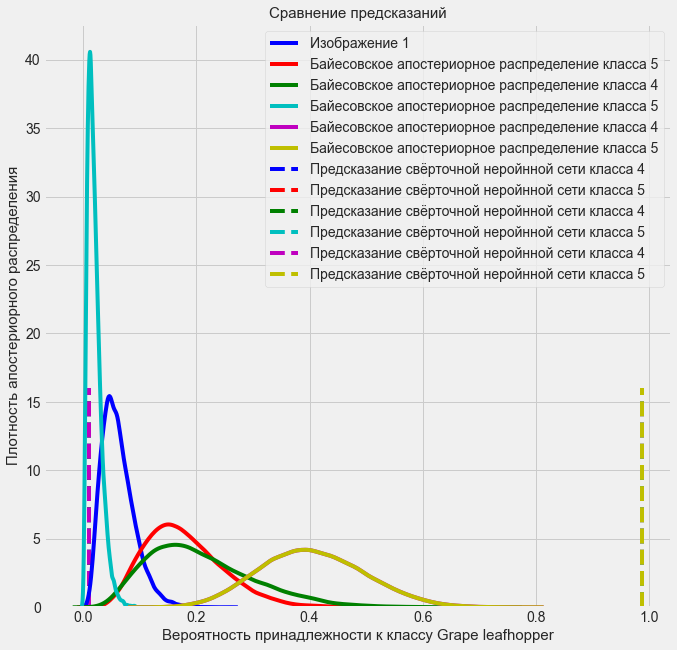

In [53]:
plt.figure(figsize = (10, 10))
#plt.style.use('fivethirtyeight')

sns.kdeplot(bayes_actual_class_prediction_1, label = 'Изображение 1', color='b')
plt.vlines(x = CNN_prediction_actual, ymin = 0, ymax = 16, label = 'Предсказание свёрточной неройнной сети класса 4', colors = 'b', linestyles='--')

sns.kdeplot(bayes_actual_class_prediction_2, label = 'Байесовское апостериорное распределение класса 5', color='r')
plt.vlines(x = CNN_prediction_predicted, ymin = 0, ymax = 16, label = 'Предсказание свёрточной неройнной сети класса 5', colors = 'r', linestyles='--')

sns.kdeplot(bayes_actual_class_prediction_3, label = 'Байесовское апостериорное распределение класса 4', color='g')
plt.vlines(x = CNN_prediction_actual, ymin = 0, ymax = 16, label = 'Предсказание свёрточной неройнной сети класса 4', colors = 'g', linestyles='--')

sns.kdeplot(bayes_actual_class_prediction_4, label = 'Байесовское апостериорное распределение класса 5', color='c')
plt.vlines(x = CNN_prediction_predicted, ymin = 0, ymax = 16, label = 'Предсказание свёрточной неройнной сети класса 5', colors = 'c', linestyles='--')

sns.kdeplot(bayes_actual_class_prediction_5, label = 'Байесовское апостериорное распределение класса 4', color='m')
plt.vlines(x = CNN_prediction_actual, ymin = 0, ymax = 16, label = 'Предсказание свёрточной неройнной сети класса 4', colors = 'm', linestyles='--')

sns.kdeplot(bayes_actual_class_prediction_6, label = 'Байесовское апостериорное распределение класса 5', color='y')
plt.vlines(x = CNN_prediction_predicted, ymin = 0, ymax = 16, label = 'Предсказание свёрточной неройнной сети класса 5', colors = 'y', linestyles='--')

plt.legend();
plt.xlabel('Вероятность принадлежности к классу Grape leafhopper', size = 15)
plt.ylabel('Плотность апостериорного распределения', size = 15);
plt.title('Сравнение предсказаний', size = 15);